In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
invoices=pd.read_csv(r'D:\data science\Brainwave Matrix Solutions\task 1\Invoices.csv')
orderleads=pd.read_csv(r'D:\data science\Brainwave Matrix Solutions\task 1\OrderLeads.csv')
salesteam=pd.read_csv(r'D:\data science\Brainwave Matrix Solutions\task 1\SalesTeam.csv')

In [33]:
invoices.head() #الفواتير

,Order Id,Date,Meal Id,Company Id,Date of Meal,Participants,Meal Price,Type of Meal
0,839FKFW2LLX4LMBB,27-05-2016,INBUX904GIHI8YBD,LJKS5NK6788CYMUU,2016-05-31 07:00:00+02:00,['David Bishop'],469,Breakfast
1,97OX39BGVMHODLJM,27-09-2018,J0MMOOPP709DIDIE,LJKS5NK6788CYMUU,2018-10-01 20:00:00+02:00,['David Bishop'],22,Dinner
2,041ORQM5OIHTIU6L,24-08-2014,E4UJLQNCI16UX5CS,LJKS5NK6788CYMUU,2014-08-23 14:00:00+02:00,['Karen Stansell'],314,Lunch
3,YT796QI18WNGZ7ZJ,12-04-2014,C9SDFHF7553BE247,LJKS5NK6788CYMUU,2014-04-07 21:00:00+02:00,['Addie Patino'],438,Dinner
4,6YLROQT27B6HRF4E,28-07-2015,48EQXS6IHYNZDDZ5,LJKS5NK6788CYMUU,2015-07-27 14:00:00+02:00,['Addie Patino' 'Susan Guerrero'],690,Lunch


In [29]:
invoices.describe() 

,Meal Price
count,50017.000000
mean,403.256713
std,234.128913
min,6.000000
25%,204.000000
50%,398.000000
75%,593.000000
max,1065.000000


In [30]:
orderleads.head() #طلبات الشراء

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,80EYLOKP9E762WKG,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,18-02-2017,4875,1
1,TLEXR1HZWTUTBHPB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,30-07-2015,8425,0
2,839FKFW2LLX4LMBB,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,27-05-2016,4837,0
3,97OX39BGVMHODLJM,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,27-09-2018,343,0
4,5T4LGH4XGBWOD49Z,LJKS5NK6788CYMUU,Chimera-Chasing Casbah,14-01-2016,983,0


In [31]:
orderleads.describe()

,Order Value,Converted
count,100000.000000,100000.000000
mean,5051.859850,0.170290
std,2859.400416,0.375889
min,100.000000,0.000000
25%,2586.000000,0.000000
50%,5056.000000,0.000000
75%,7528.000000,0.000000
max,9999.000000,1.000000


In [ ]:
salesteam.head()  #فريق المبيعات

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,Jessie Mcallister,97UNNAT790E0WM4N,Chimera-Chasing Casbah,LJKS5NK6788CYMUU
1,Jessie Mcallister,97UNNAT790E0WM4N,Tangential Sheds,36MFTZOYMTAJP1RK
2,Jessie Mcallister,97UNNAT790E0WM4N,Two-Mile Grab,H3JRC7XX7WJAD4ZO
3,Jessie Mcallister,97UNNAT790E0WM4N,Three-Men-And-A-Helper Congo'S,HB25MDZR0MGCQUGX
4,Jessie Mcallister,97UNNAT790E0WM4N,Biophysical Battleground,7RVA8TIVBLBXMNO4


In [11]:
salesteam.describe()

,Sales Rep,Sales Rep Id,Company Name,Company Id
count,4725,4725,4725,4725
unique,500,500,4725,4725
top,Jessie Mcallister,97UNNAT790E0WM4N,Chimera-Chasing Casbah,LJKS5NK6788CYMUU
freq,18,18,1,1


In [ ]:
invoices.info()
orderleads.info()
salesteam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50017 entries, 0 to 50016
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order Id      50017 non-null  object
 1   Date          50017 non-null  object
 2   Meal Id       50017 non-null  object
 3   Company Id    50017 non-null  object
 4   Date of Meal  50017 non-null  object
 5   Participants  50017 non-null  object
 6   Meal Price    50017 non-null  int64 
 7   Type of Meal  50017 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Order Id      100000 non-null  object
 1   Company Id    100000 non-null  object
 2   Company Name  100000 non-null  object
 3   Date          100000 non-null  object
 4   Order Value   100000 non-null  int64 
 5   Convert

In [25]:
#convert Date of Meal from object to date

invoices['Date of Meal'] = pd.to_datetime(invoices['Date of Meal'])

C:\Users\Mohamed Hagag\AppData\Local\Temp\ipykernel_30456\1530094647.py:3: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  invoices['Date of Meal'] = pd.to_datetime(invoices['Date of Meal'])


In [ ]:
#check Null

invoices.isna().sum()

Order Id        0
Date            0
Meal Id         0
Company Id      0
Date of Meal    0
Participants    0
Meal Price      0
Type of Meal    0
dtype: int64

In [ ]:
orderleads.isna().sum()

Order Id        0
Company Id      0
Company Name    0
Date            0
Order Value     0
Converted       0
dtype: int64

In [15]:
salesteam.isna().sum()

Sales Rep       0
Sales Rep Id    0
Company Name    0
Company Id      0
dtype: int64

In [ ]:
#check duplicated


invoices.duplicated().sum()

0

In [ ]:
orderleads.duplicated().sum()

0

In [18]:
salesteam.duplicated().sum()

0

<Axes: >

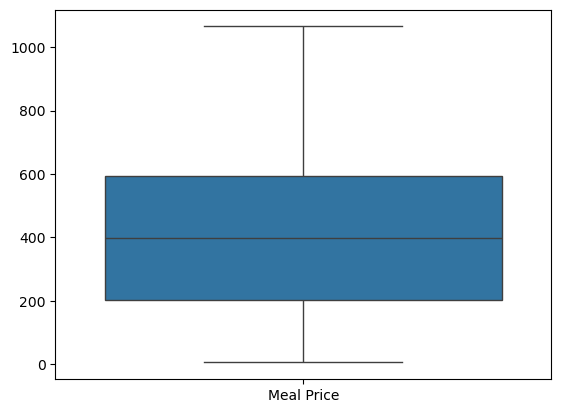

In [ ]:
#check Outlier


sns.boxplot(invoices)
plt.title("check outlier in invoices")
plt.show()

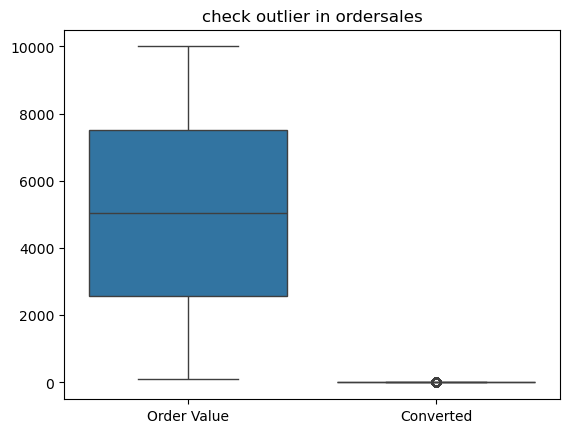

In [21]:
sns.boxplot(ordersales)
plt.title("check outlier in ordersales")
plt.show()

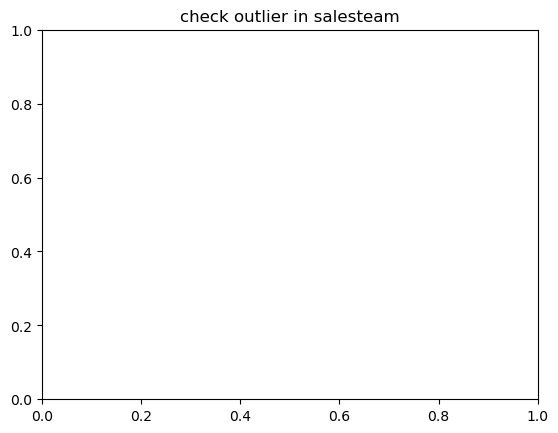

In [22]:
sns.boxplot(salesteam)
plt.title("check outlier in salesteam")
plt.show()

In [32]:
#analsis sales invoices
invoices.groupby('Type of Meal')['Meal Price'].max()


Type of Meal
Breakfast    1059
Dinner       1065
Lunch        1033
Name: Meal Price, dtype: int64